In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

import xarray as xr
import cartopy.crs as ccrs


from pathlib import Path

import sys
sys.path.append("..")

import flutter


In [2]:
flutter.test_import()

Package flutter imported!


In [3]:
## Directories
dir_data = Path("../data/reduced")
# dir_fig = Path("../fig")
dir_fig = Path("../data/fig")
dir_vid = dir_fig/ "vid"

f_var_fun = lambda var : f"hundred_members_{var}_pf.nc"
f_var = {var:f_var_fun(var) for var in
    ["2t",
    "msl",
    "10fg",
    "tp"]}

In [4]:
figsize = (6,5)
# matplotlib.rcParams['figure.figsize'] = figsize


In [5]:
## Load temperature data

filename = dir_data/f_var["2t"]
da = xr.load_dataset(filename)
da = da.assign_coords({"longitude": [ i if i <= 180 else i-360 for i in da.longitude.values]})
# reduce spatial range
da_small=da.sel(longitude=slice(-20,20),latitude=slice(50,40))
da = da.sel(longitude=slice(-20,20),latitude=slice(65,35))


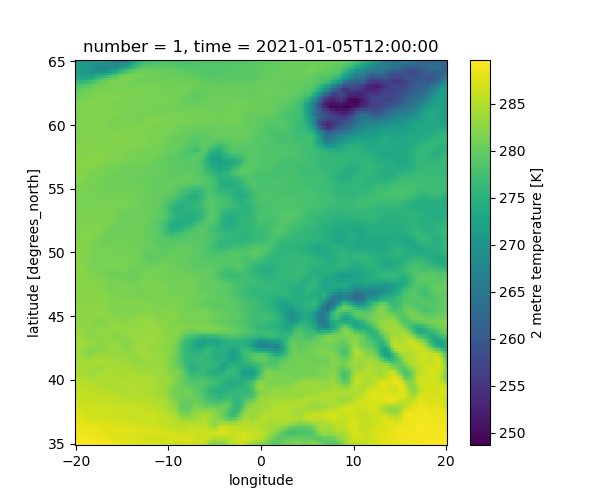

In [6]:
da.sel(number=1).isel(time=1).t2m.plot(figsize=figsize)

In [ ]:
# da_mean = da.mean(dim="number")

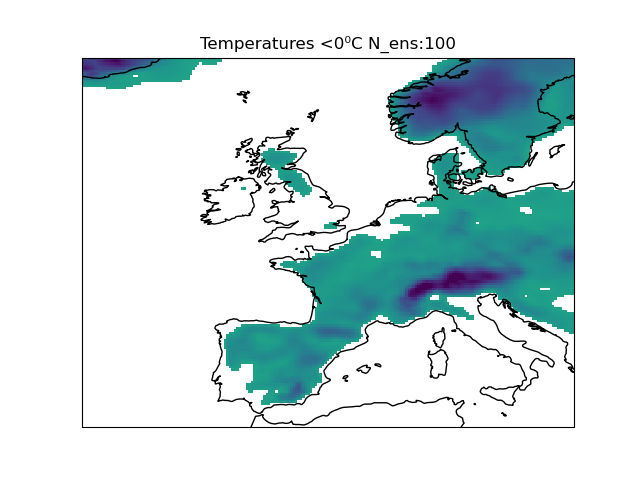

In [7]:
## Animation
# evolving timesteps 
# threshold temperature - freezing

# Es=[50]
Es=[50,100] 
# Es=[10,20,50,100]

timesteps = 5
Ts = range(0,11,11//timesteps)

n_repetitions = 2
shuffle = True

# temp_threshold = 268
temp_threshold = 273.15 
params_temp = dict(vmin=250, vmax=290)


for E in Es:
    flutter.export_flutter(da,Ts,E,
            filename=dir_vid/f"ensembles_time_freezing_T{timesteps}_{E}.mp4",
            projection= ccrs.PlateCarree(),
            transform = ccrs.PlateCarree(),
            plot_params=params_temp,
            threshold=temp_threshold,
            n_repetitions=n_repetitions, shuffle=shuffle,
            title=f"Temperatures <0⁰C N_ens:{E:3}"
            )

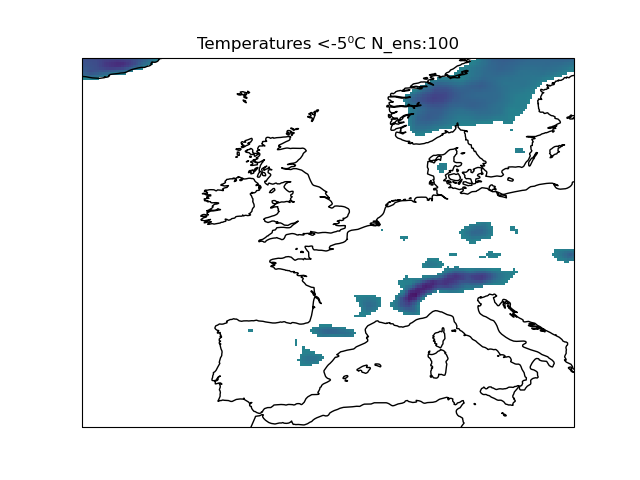

In [8]:
## Animation
# evolving timesteps 
# threshold temperature - subfreezing

# Es=[50]
Es=[50,100] 
# Es=[10,20,50,100]

timesteps = 5
Ts = range(0,11,11//timesteps)

n_repetitions = 2
shuffle = True

temp_threshold = 268
# temp_threshold = 273.15 
params_temp = dict(vmin=250, vmax=290)


for E in Es:
    flutter.export_flutter(da,Ts,E,
            filename=dir_vid/f"ensembles_time_subfreezing_T{timesteps}_{E}.mp4",
            projection= ccrs.PlateCarree(),
            transform = ccrs.PlateCarree(),
            plot_params=params_temp,
            threshold=temp_threshold,
            n_repetitions=n_repetitions, shuffle=shuffle,
            title=f"Temperatures <-5⁰C N_ens:{E:3}"
            )

In [ ]:
# f"N_ens:{E:3}  time: {datef(dt)}"

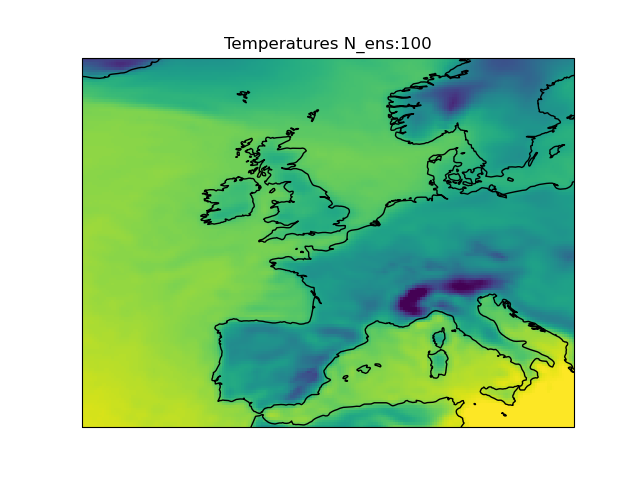

In [9]:
## Animation
# evolving timesteps 
# temperature - no threshold

# Es=[50]
Es=[50,100] 
# Es=[10,20,50,100]

timesteps = 5
Ts = range(0,11,11//timesteps)

n_repetitions = 2
shuffle = True

temp_threshold = None
# temp_threshold = 273.15 
params_temp = dict(vmin=250, vmax=290)


for E in Es:
    flutter.export_flutter(da,Ts,E,
            filename=dir_vid/f"ensembles_time_temp_T{timesteps}_{E}.mp4",
            projection= ccrs.PlateCarree(),
            transform = ccrs.PlateCarree(),
            plot_params=params_temp,
            threshold=temp_threshold,
            n_repetitions=n_repetitions, shuffle=shuffle,
            title=f"Temperatures N_ens:{E:3}"
            )